#**K-Nearest**
El algoritmo K-nearest es un algoritmo que tiene como proposito general obtener los K vecinos mas cercanos a un punto en el espacio de acuerdo a una metrica dada, esta por lo general suele ser la distancia euclidia. Por lo general este algoritmo se utiliza para clasificacion de datos, aunque tambien puede ser usado para regresion.

##**Pasos:**
* Recibe un valor K y un dato de origen.
* Calcula el valor de distancia de todos los vecinos del dato de origen en el dataset.
* Se organizan los vecinos desde el de menor distancia hasta el de mayor distancia.
* Se toman los K vecinos mas cercanos.

##**Ejemplo de Implementacion**

In [5]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

### **1. Carga del Conjunto de Datos**
- Se utiliza el conjunto de datos **Iris**, disponible en `sklearn.datasets`.
- Se almacena en un `DataFrame` para facilitar su manipulación.


In [6]:
# Cargar el dataset Iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Mostrar las primeras filas del dataset
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **2. División del Conjunto de Datos y nomralizacion**
- Se separan las características (`X`) y la etiqueta (`y`).
- Se dividen los datos en conjuntos de entrenamiento y prueba usando `train_test_split`.
- Se emplea `StandardScaler` para escalar los datos y mejorar la precisión del modelo.

In [7]:
# Dividir los datos en características (X) y etiquetas (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **4. Implementación Manual de KNN**
- Se define la función `euclidean_distance()` para calcular la distancia entre puntos.
- La función `knn_predict()` implementa el algoritmo:
  - Calcula la distancia de un punto de prueba con todos los puntos de entrenamiento.
  - Ordena las distancias y selecciona los `k` vecinos más cercanos.
  - Predice la clase mayoritaria entre los vecinos.

In [8]:
# Implementación manual del algoritmo K-Nearest Neighbors
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = []
        for i, train_point in enumerate(X_train):
            dist = euclidean_distance(test_point, train_point)
            distances.append((dist, y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest_labels = [label for _, label in distances[:k]]
        predicted_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
        y_pred.append(predicted_label)
    return np.array(y_pred)

### **5. Evaluación del Modelo**
- Se realiza una predicción con `k=5`.
- Se calcula la precisión del modelo comparando las predicciones con las etiquetas reales.

In [9]:
# Definir el número de vecinos
k = 5
y_pred = knn_predict(X_train, y_train, X_test, k)

# Evaluar el modelo
accuracy = np.mean(y_pred == y_test)
print(f'Precisión del modelo KNN con k={k}: {accuracy:.2f}')

Precisión del modelo KNN con k=5: 1.00


### **6. Visualización de la Precisión para Diferentes Valores de `k`**
- Se prueba el modelo con valores de `k` entre 1 y 20.
- Se grafica la relación entre `k` y la precisión para encontrar el mejor valor.

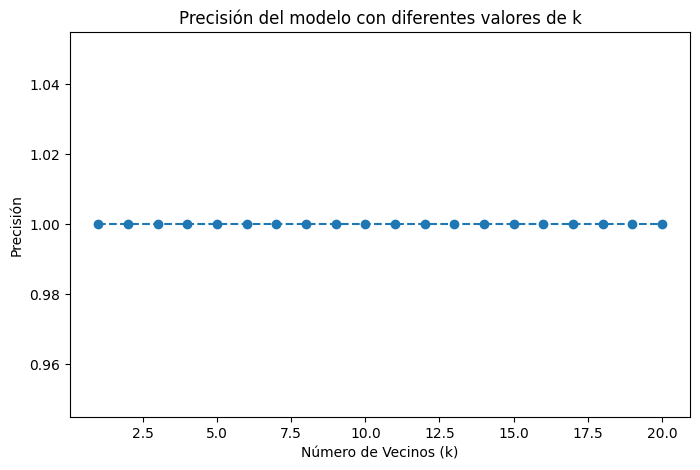

In [10]:
# Visualizar la precisión con diferentes valores de k
k_values = range(1, 21)
accuracies = []
for k in k_values:
    y_pred = knn_predict(X_train, y_train, X_test, k)
    accuracies.append(np.mean(y_pred == y_test))

plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.title('Precisión del modelo con diferentes valores de k')
plt.show()